<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/softmax_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[99 88 93]


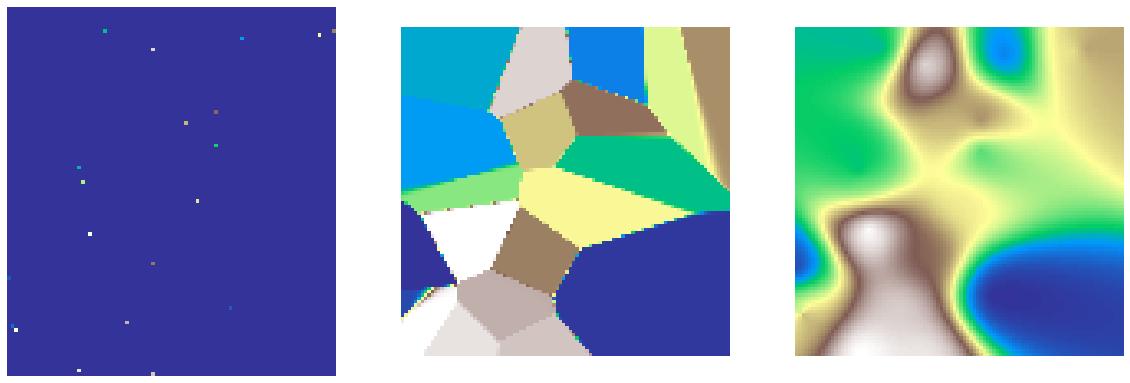

In [ ]:
N = 100
n_corners = 20
liste = []
for _ in range(n_corners):
    liste.append(np.random.randint(0,N, (3,)))
corners = np.array([[int(N/2),0,1],
                    [0,int(N/2),5],
                    [N,N,6]
                    ])
corners = np.stack(liste)
print(np.max(corners, axis=0))

def softmax(data):
    e_data = np.exp(data)
    e_data /= np.sum(e_data, axis=-1)[:,None]
    return e_data

def drawdatboi(data):
    img = getimg(data)
    plt.figure()
    plt.imshow(img, cmap="terrain")
    plt.axis("off")
    plt.show()

def getimg(data):
    """
    Verwandle Koordinatenliste in Bild (Hintergrund schwarz)
    Eingabe: 
        data: Liste mit Koordinaten und Farbwerten
            [10, 5, 0.1] wäre beispielsweise die "Farbe" 0.1 in Zeile 10, Spalte 5
    Ausgabe:
        img: Matrix mit befüllten Farbwerten
    """
    img = np.zeros(np.max(data, axis=0).astype(np.intc)[:-1]+1)
    img[data[:,0].astype(np.intc), data[:,1].astype(np.intc)] = data[:,2]
    img /= np.max(img)
    return img

def pointwise(d1, d2):
    """
    Punktweiser Abstand zweier Listen mit Punkten
    Eingabe:
        d1: Liste mit Punkten R^{nxm}
        d2: Liste mit Punkten R^{pxm}
    Ausgabe:
        out: Matrix mit Abständen zwischen jeweiligen Punkten R^{nxp}
    """
    #out = (np.sum((d1[:,None]-d2)**2, axis=-1))
    out = np.sqrt(np.sum((d1[:,None]-d2)**2, axis=-1))
    return out

base = np.arange(0,N)
mapbase = np.reshape(np.stack(np.meshgrid(base, base)).T, (N**2, 2))
t1 = 10
t2 = 0.2

map1 = np.column_stack((mapbase, softmax(-t1*pointwise(mapbase, corners[:,:2]))@corners[:,-1]))
map2 = np.column_stack((mapbase, softmax(-t2*pointwise(mapbase, corners[:,:2]))@corners[:,-1]))

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.imshow(getimg(corners), cmap="terrain")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(getimg(map1), cmap="terrain")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(getimg(map2), cmap="terrain")
plt.axis("off")
plt.show()

In [ ]:
test = "00001 19370101 19860630            478     47.8413    8.8493 Aach                                     Baden-Württemberg  "
print([d for d in test.split(" ") if not d==""])

['00001', '19370101', '19860630', '478', '47.8413', '8.8493', 'Aach', 'Baden-Württemberg']
